<a href="https://colab.research.google.com/github/good0neighbour/ESTCampAI/blob/main/Deeplearning/03_%EA%B0%9C%2C%EA%B3%A0%EC%96%91%EC%9D%B4_%EB%B6%84%EB%A5%98_%EB%AA%A8%EB%8D%B8%EB%A7%81(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/ESTCampAI/Deeplearning

/content/drive/MyDrive/ESTCampAI/Deeplearning


### MLP
이미지 위치에 민감 → 모든 픽셀을 연산
숫자 인식을 하려면 크기, 위치를 비슷하게 해야 가능
2. 2차원 이미지를 1차원화하면서(Flatten 사용) 위치 관계에 대한 정보도 잃었음

### CNN(Convolutional Neural NetWork)
- 특징 부분을 추출
- MLP 기반으로 만들어진 모델

### 목표
-MLP, CNN 모델을 활용해서 이미지 분류 모델링 실습
  -> 두 모델 성능 비교
- 딥러닝 성능을 올릴 수 있는 방법도 배워보자

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# npz 파일 불러오기
data = np.load('./data/np_cat_vs_dogs.npz')

In [9]:
X_train = data['X_train']
X_test = data['X_test']
y_train = data['y_train']
y_test = data['y_test']

In [10]:
# 모양 확인
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2000, 224, 224, 3), (1000, 224, 224, 3), (2000,), (1000,))

### MLP 모델링 수행
1. 신경망 구조 설계
- Flatten 넣어주기
- 중간층 : 3개 layer, units = [256, 128, 64], 활성화함수 = 'relu'
2. 학습 방법 설정
- adam, accuracy
- 조기 학습 중단 : val set 5회
3. 학습
- epochs = 40, validation_split = 30%
4. 시각화 train_acc, val_acc

Epoch 1/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 37s 785ms/step - accuracy: 0.5456 - loss: 2635.8984 - val_accuracy: 0.0100 - val_loss: 2258.4060
Epoch 2/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 35s 795ms/step - accuracy: 0.6465 - loss: 651.2771 - val_accuracy: 0.0017 - val_loss: 1828.8263
Epoch 3/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 35s 796ms/step - accuracy: 0.6109 - loss: 730.1478 - val_accuracy: 0.0050 - val_loss: 1174.7902
Epoch 4/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 34s 782ms/step - accuracy: 0.6077 - loss: 676.4941 - val_accuracy: 0.0000e+00 - val_loss: 6079.1519
Epoch 5/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 41s 785ms/step - accuracy: 0.6760 - loss: 572.6281 - val_accuracy: 0.1067 - val_loss: 526.2207
Epoch 6/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 43s 830ms/step - accuracy: 0.6802 - loss: 242.7681 - val_accuracy: 0.2750 - val_loss: 322.6151
Epoch 7/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 42s 873ms/step - accuracy: 0.6689 - loss: 191.3058 - val_accuracy: 0.0750 - val_loss: 506.4670
Epoch 8/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 35s 792ms/step - accur

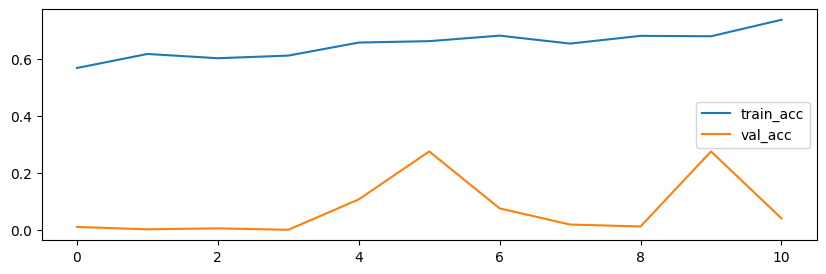

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()

model.add(InputLayer(shape = X_train[0].shape))

model.add(Flatten())
model.add(Dense(units = 256, activation = 'relu'))
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 64, activation = 'relu'))

model.add(Dense(1, activation = "sigmoid"))

earlyStopping = EarlyStopping(monitor = "val_accuracy", patience = 5)

model.compile(
    optimizer = "Adam",
    metrics = ["accuracy"],
    loss = 'binary_crossentropy'
)

h = model.fit(X_train, y_train, validation_split = 0.3, epochs = 40, callbacks = [earlyStopping])

plt.figure(figsize = (10, 3))
plt.plot(h.history['accuracy'], label = 'train_acc')
plt.plot(h.history['val_accuracy'], label = 'val_acc')
plt.legend()
plt.show()